<a href="https://colab.research.google.com/github/momo4201/AI-ML-projects/blob/main/intro_to_deep_learning_coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
import pytest
%matplotlib inline

https://github.com/ToshalGhimire/Machine-Learning-Practice/blob/master/Single-Layer%20Perceptron%2C%20Neural%20Networks%20and%20Email%20Classification.ipynb

Part A : Answer this question in this week's Peer Review assignment. Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize indicator activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights and biases as applicable:

i.    𝙽𝙾𝚃 𝑥1


ii.    𝑥1 𝙽𝙾𝚁 𝑥2


iii.    𝑥1 𝚇𝙽𝙾𝚁 𝑥2
  (output 1 when  𝑥1=𝑥2
  and 0 otherwise)

In [ ]:
x1 = [0,1,0,1]
x2 = [0,0,1,1]

def sign(x):
    return 1 if x>=0 else 0
#NOT x1
weight = [-1]
bias = 0.5

def testNOT(x1, weight, bias):
    for i in range(len(x1)):
        z = weight[0]*x1[i] +bias
        a = sign(z)
        print("NOT",x1[i],"=",a)

testNOT(x1, weight, bias)
print("With weight",weight,"and bias",
      bias,"percption learning can learn NOT x1\n")

# 𝑥1  NAND 𝑥2
weight = [-1,1]
bias = 1.5

def testNAND(x1,x2, weight, bias):
    for i in range(len(x1)):
        z = weight[0]*x1[i] + weight[1]*x2[i] + bias
        a = sign(z)
        print(x1[i],"NAND", x2[i], "=", a)

testNAND(x1,x2,weight,bias)
print("With weight",weight,"and bias",bias,"percption learning can learn x1 NAND x2\n")

print("Since XNOR is not linearly seperable a single layer perception algroithm cannot learn it")

NOT 0 = 1
NOT 1 = 0
NOT 0 = 1
NOT 1 = 0
With weight [-1] and bias 0.5 percption learning can learn NOT x1

0 NAND 0 = 1
1 NAND 0 = 1
0 NAND 1 = 1
1 NAND 1 = 1
With weight [-1, 1] and bias 1.5 percption learning can learn x1 NAND x2

Since XNOR is not linearly seperable a single layer perception algroithm cannot learn it


Part B : Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with indicator activation functions that can learn  𝑥1 𝚇𝙽𝙾𝚁 𝑥2
 .

**AND uses positive weights and a negative bias.**

**NOR uses negative weights and a positive bias.**

In [ ]:
x1 = [0,1,0,1]
x2 = [0,0,1,1]

def sign(x):
  return 1 if x>=0 else 0

def AND(x1, x2):
  weight =[1,1]
  bias = -1.5
  out=[]
  for i in range(len(x1)):
    z = weight[0]*x1[i]+weight[1]*x2[i] +bias
    a = sign(z)
    out.append(a)
  return out
output1 = AND(x1,x2)


def NOR(x1, x2):
  weight =[-1,-1]
  bias = 0.5
  out=[]
  for i in range(len(x1)):
    z = weight[0]*x1[i]+weight[1]*x2[i] +bias
    a = sign(z)
    out.append(a)
  return out
output2 = NOR(x1,x2)


def OR(x1, x2):
  weight =[1,1]
  bias = -0.5
  out=[]
  for i in range(len(x1)):
    z = weight[0]*x1[i]+weight[1]*x2[i] +bias
    a = sign(z)
    out.append(a)
  return out

XNOR = OR(output1,output2)
print("x1 XNOR X2 =",XNOR)


x1 XNOR X2 = [1, 0, 0, 1]


In [ ]:

def getXNOR(x1,x2):
    output1 = AND(x1,x2)
    output2 = NOR(x1,x2)
    XNOR = OR(output1,output2)
    return XNOR

getXNOR(x1,x2)

[1, 0, 0, 1]

forward PROPAGATION
Suppose each of the weights is initialized to  𝑊𝑘=1.0
  and each bias is initialized to  𝑏𝑘=−0.5
 . Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example  (𝑥,𝑦)=(0.5,0)
 . Show your work.

In [ ]:
def sigmoid(x):
  return 1/(1+math.exp(-x))

weight, bias =[1], -0.5
x = 0.5
y = 0
a1 = x

z1 = np.dot(weight, a1)+bias
a2 = sigmoid(z1)
print("z1", z1,"\ta1:", a2)

z2 = np.dot(weight, a1)+bias
a3 = sigmoid(z2)
print("z2", z2,"\ta2:", a3)

z3 = np.dot(weight, a1)+bias
a4 = sigmoid(z3)
print("z3", z3,"\ta3:", a4)

loss = 1/2*pow((0-a4),2)  #Mean Squared Error (MSE), targeted output, y = 0
print("loss:", loss)

z1 [0.] 	a1: 0.5
z2 [0.] 	a2: 0.5
z3 [0.] 	a3: 0.5
loss: 0.125


/tmp/ipython-input-8-1423112543.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-x))


Part B: Use Back-Propagation to compute the weight and bias derivatives  ∂ℓ/∂𝑊𝑘
  and  ∂ℓ/∂𝑏𝑘
  for  𝑘=1,2,3
 . Show all work. Answer the Peer Review question about this section.

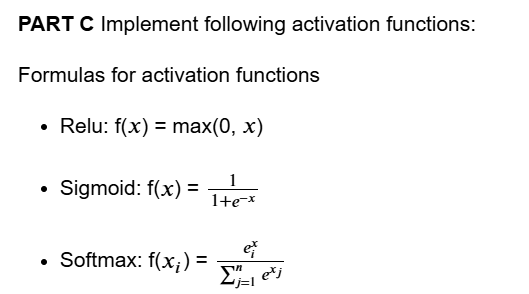

In [ ]:
import math

def relu(x):
    return x if x >0 else 0

def sigmoid(x):
    return 1/(1+math.exp(-x))

def soft_max(x):
    out = []
    SUM = 0
    for i in x:
        SUM += math.exp(i)

    for i in x:
        out.append(math.exp(i)/SUM)

    return out

In [ ]:
assert relu(5) == 5
assert relu(-5) == 0
assert relu(0) == 0
assert relu(5) == 5

assert sigmoid(0.458) == 0.61253961344091512
assert sigmoid(2) == 0.8807970779778823
res = soft_max([1,2,4])
temp = [0.04201007, 0.1141952 , 0.84379473]
for i in range(len(temp)):
    assert res[i] - temp[i] < 1e-5

PART D Implement the following Loss functions:

Formulas for activation functions

Mean squared error
Formula: MSE = (1/n) * Σ(yi - ŷi)^2

Mean absolute error
Formula: MAE = (1/n) * Σ|yi - ŷi|

Hinge Loss
Formula: L = max(0, 1 - yi * ŷi)

In [ ]:
def mean_squared_error(yhat, y):
    mse = np.mean(np.power(yhat-y, 2))
    return mse

def mean_absolute_error(yhat, y):
    mae = np.mean(np.abs(yhat-y))
    return mae

def hinge_loss(yhat, y):
    hinge = np.mean(np.maximum(0, 1-y*yhat))
    return hinge



In [ ]:
yhat = np.array([3, -0.5, 2, 7])
y = np.array([2.5, 0.0, 2, 8])
print(mean_squared_error(yhat,y) )
print(mean_absolute_error(yhat,y) )
print(hinge_loss(yhat,y) )


0.375
0.5
0.25


Build a feed-forward neural network

In this problem you'll implement a general feed-forward neural network class that utilizes sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent

 Implement SGD_train, back_prop,forward_prop.


In [ ]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt

In [ ]:
class Network:
  def __init__(self, sizes):
    self.L = len(sizes)
    self.sizes = sizes
    self.biases = [np.random.radn(n,1) for n in self.sizes[1:]]
    self.weights = [np.random.randn(n, m) for n, m in zip(self.sizes[1:], self.sizes[1:])]

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements it's own forward_prop
        """

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            a = self.g(z)

        return a


    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None,random=False):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)

        for epoch in range(epochs):

            # Shuffleing data within each epochs
            shuffle_ind = np.random.permutation(train)

            for ind in range(n_train):
                x = shuffle_ind[ind][0]
                y = shuffle_ind[ind][1]

                dw, db = self.back_prop(x,y)

                # Updating weights using dl/dw and bias using dl/wb from back propagation
                for ii in range(self.L-1):
                    self.weights[ii] = self.weights[ii] - eta*(lam * self.weights[ii] + dw[ii])
                    self.biases[ii] = self.biases[ii] - eta*db[ii]


            # Printing the process
            if verbose:
                if epoch == 0 or (epoch + 1) % 15 == 0:
                    acc_train = self.evaluate(train)
                    if test is not None:
                        acc_test = self.evaluate(test)
                        # epoch_accuracy_list.append((acc_test,acc_train))    #omit
                        print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                            epoch+1, acc_train, acc_test))

                        self.train_acc = acc_train
                        self.test_acc = acc_test
                    else:
                        print("Epoch {:4d}: Train {:10.5f}".format(
                            epoch+1, acc_train))

    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]


        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with throwaway so indices match

        # Preform forward propagation
        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # initilize delta to zeros
        delta = [np.zeros((n, 1)) for n in self.sizes]
        ##print("inital delta:",delta)

        # set delta for the last layer
        delta[self.L - 1 ] = self.g_prime(z_list[self.L-1]) *self.grad_cost(a_list[self.L-1],y)
        ##print("last delta:",delta[self.L - 1 ])

        # Back propagation done here
        for ll in range(self.L-2,-1,-1):
            dW_list[ll] = np.dot(delta[ll+1],a_list[ll].T)
            db_list[ll] = delta[ll+1]
            delta[ll] = np.dot(self.weights[ll].T,delta[ll+1]) *self.g_prime(z_list[ll])

        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += np.argmax(yhat) == np.argmax(y)
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()



In [ ]:
%run -i tests/tests3.py

Exception: File `'tests/tests3.py'` not found.

In [ ]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
hidden_layer_dimensions = 10
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)
print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test,random=True)

FileNotFoundError: [Errno 2] No such file or directory: './data/tinyMNIST.pkl.gz'

Text(0.5, 1.0, 'Train vs Test Accuracy with 100 epochs')

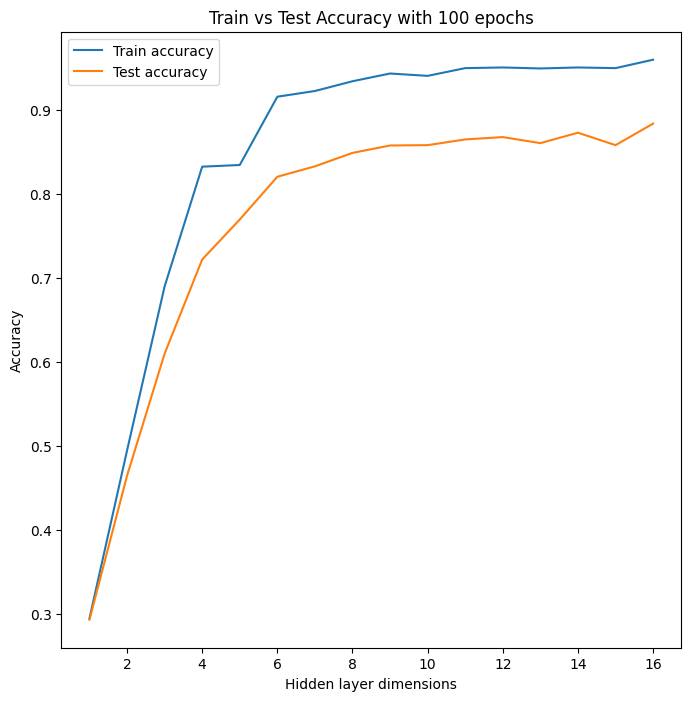

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
epoch = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

# COMMENT OUT IF YOU PLAN ON RUNNING THE CELL ABOVE
trainACC = [0.29491796718687474, 0.49459783913565425, 0.689875950380152, 0.8323329331732693, 0.8343337334933973, 0.9155662264905963, 0.9223689475790317, 0.9339735894357744, 0.9431772709083633, 0.9403761504601841, 0.9495798319327731, 0.9503801520608244, 0.9491796718687475, 0.9503801520608244, 0.9495798319327731, 0.9595838335334134]
testACC = [0.2933173269307723, 0.4645858343337335, 0.60984393757503, 0.7218887555022009, 0.7695078031212484, 0.820328131252501, 0.8327330932372949, 0.8487394957983193, 0.8575430172068828, 0.8579431772709084, 0.8647458983593438, 0.867547018807523, 0.860344137655062, 0.8727490996398559, 0.8579431772709084, 0.8835534213685474]


ax.plot(epoch,trainACC,label="Train accuracy")
ax.plot(epoch,testACC,label="Test accuracy")
ax.legend()
ax.set_xlabel("Hidden layer dimensions")
ax.set_ylabel("Accuracy")
ax.set_title("Train vs Test Accuracy with 100 epochs")

In [ ]:
import numpy as np

def sgd(x, y, beta, eta, num_iters):
    """
    Performs stochastic gradient descent to learn beta.

    Arguments:
        x -- a numpy array of shape (n,)
        y -- a numpy array of shape (n,)
        beta -- a numpy array of shape (2,), the initial guess
        eta -- the learning rate
        num_iters -- the number of iterations to run

    Returns:
        beta -- the learned beta
        bhist -- a list of all beta guesses for plotting
    """
    n = x.shape[0]
    bhist = [beta] # History of beta values

    # Loop for the specified number of iterations
    for j in range(num_iters):
        # Loop through each data point
        for i in range(n):


            error_i = (beta[0] + beta[1] * x[i]) - y[i]

            # Calculate the partial derivative with respect to beta_0
            partial_0 = 2 * error_i

            # Calculate the partial derivative with respect to beta_1
            partial_1 = 2 * error_i * x[i]


            # Update beta using the learning rate and the partial derivatives
            beta = beta - eta * np.array([partial_0, partial_1])

            # Store the updated beta for this step
            bhist.append(beta)

    return beta, bhist

In [ ]:
import numpy as np

def sgd_vectorized(X, y, beta, eta, num_iters):
    """
    Performs vectorized stochastic gradient descent to learn beta.
    This function can handle any number of features.

    Arguments:
        X -- a numpy array of shape (n_samples, n_features)
        y -- a numpy array of shape (n_samples,)
        beta -- a numpy array of shape (n_features + 1,), the initial guess
        eta -- the learning rate
        num_iters -- the number of iterations to run

    Returns:
        beta -- the learned parameters
        bhist -- a list of all beta guesses for plotting
    """

    n_samples = X.shape[0]


    X_b = np.c_[np.ones(n_samples), X]

    # History of beta values
    bhist = [beta]

    # Loop for the specified number of iterations
    for j in range(num_iters):
        # Loop through each data point (this is the "stochastic" part)
        for i in range(n_samples):

            xi = X_b[i]

            # Get the i-th target value
            yi = y[i]

            # 1. Prediction
            prediction = xi.dot(beta)

            # 2. Error
            error = prediction - yi

            # 3. Gradient
            # This is 2 * error * xi
            gradient = 2 * error * xi

            # 4. Update
            beta = beta - eta * gradient

            # Store the updated beta for this step
            bhist.append(beta)

    return beta, bhist


In [ ]:
import numpy as np

def compute_mse_history(X, y, beta_history):
    """
    Compute Mean Squared Error (MSE) for each epoch in beta history.

    Parameters:
    X : numpy array of shape (m, n), feature matrix (m samples, n features)
    y : numpy array of shape (m,), target values
    beta_history : list of numpy arrays, each of shape (n+1,), parameter history

    Returns:
    mse_history : numpy array of shape (len(beta_history),), MSE values for each epoch
    """
    # Add intercept term (column of ones) to feature matrix
    X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

    # Initialize array to store MSE values
    mse_history = np.zeros(len(beta_history))

    # Calculate MSE for each set of parameters in history
    for i, beta in enumerate(beta_history):
        # Compute predictions for all samples
        predictions = np.dot(X_with_intercept, beta)

        # Calculate squared errors
        squared_errors = (predictions - y) ** 2

        # Compute mean squared error
        mse_history[i] = np.mean(squared_errors)

    return mse_history

# Example dataset
X = np.array([[1, 2], [3, 4], [5, 6]])  # 3 samples, 2 features
y = np.array([3, 7, 11])  # Target values

# Example beta history (3 epochs)
beta_history = [
    np.array([0.0, 0.0, 0.0]),  # Initial parameters
    np.array([0.5, 0.8, 1.2]),  # After 1st epoch
    np.array([1.0, 1.5, 2.0])   # After 2nd epoch
]

# Compute MSE history
mse_values = compute_mse_history(X, y, beta_history)
print("MSE values for each epoch:", mse_values)

MSE values for each epoch: [59.66666667  0.49       48.25      ]


In [ ]:
import matplotlib.pyplot as plt

def plot_mse_history(mse_history):
    """
    Plot Mean Squared Error (MSE) values against epoch number.

    Parameters:
    mse_history : list or numpy array, MSE values for each epoch
    """
    plt.figure(figsize=(10, 6))
    plt.plot(mse_history, 'b-', linewidth=2)
    plt.title('MSE vs. Epoch Number', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Mean Squared Error', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 2 + 3 * X + np.random.randn(100, 1) * 2  # y = 2 + 3x + noise

# Initialize parameters
beta_init = np.array([0.0, 0.0])  # [intercept, slope]

# Test different learning rates
learning_rates = [0.001, 0.01, 0.5]
colors = ['blue', 'green', 'red']
labels = ['Small (0.001)', 'Moderate (0.01)', 'Large (0.5)']

plt.figure(figsize=(12, 6))

for lr, color, label in zip(learning_rates, colors, labels):
    # Adjust epochs based on learning rate
    if lr == 0.001:
        epochs = 1000  # More epochs for small learning rate
    elif lr == 0.01:
        epochs = 100   # Moderate epochs
    else:
        epochs = 50    # Fewer epochs for large learning rate

    # Run SGD and get beta history
    beta_history = []
    sgd_vectorized(X, y, beta_init.copy(), lr, epochs, beta_history)

    # Compute MSE history
    mse_history = compute_mse_history(X, y, beta_history)

    # Plot MSE vs epoch
    plt.plot(mse_history, color=color, label=label, linewidth=2)

plt.title('MSE Convergence with Different Learning Rates', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def sgd_with_validation(X_train, y_train, X_val, y_val, beta, eta, n_iters):
    """
    Perform SGD while tracking both training and validation MSE.

    Parameters:
    X_train, y_train : Training data
    X_val, y_val : Validation data
    beta : Initial parameter values
    eta : Learning rate
    n_iters : Number of iterations

    Returns:
    beta : Final parameter values
    train_mse_history : Training MSE for each epoch
    val_mse_history : Validation MSE for each epoch
    """
    # Add intercept term to both training and validation data
    X_train_with_intercept = np.column_stack([np.ones(X_train.shape[0]), X_train])
    X_val_with_intercept = np.column_stack([np.ones(X_val.shape[0]), X_val])

    # Initialize history lists
    train_mse_history = []
    val_mse_history = []

    # Perform SGD iterations
    for _ in range(n_iters):
        # Loop through each training sample
        for i in range(X_train_with_intercept.shape[0]):
            # Compute prediction and error
            prediction = np.dot(X_train_with_intercept[i], beta)
            error = prediction - y_train[i]

            # Update parameters
            beta = beta - eta * error * X_train_with_intercept[i]

        # Calculate and store training MSE for this epoch
        train_predictions = np.dot(X_train_with_intercept, beta)
        train_mse = np.mean((train_predictions - y_train) ** 2)
        train_mse_history.append(train_mse)

        # Calculate and store validation MSE for this epoch
        val_predictions = np.dot(X_val_with_intercept, beta)
        val_mse = np.mean((val_predictions - y_val) ** 2)
        val_mse_history.append(val_mse)

    return beta, train_mse_history, val_mse_history

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 1) * 10  # 200 samples, 1 feature
y = 2 + 3 * X + np.random.randn(200, 1) * 2  # y = 2 + 3x + noise

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize parameters
beta_init = np.array([0.0, 0.0])  # [intercept, slope]

# Run SGD with validation tracking
beta_final, train_mse, val_mse = sgd_with_validation(
    X_train, y_train, X_val, y_val,
    beta_init.copy(),
    eta=0.01,
    n_iters=100
)

# Plot both training and validation MSE
plt.figure(figsize=(12, 6))
plt.plot(train_mse, 'b-', linewidth=2, label='Training MSE')
plt.plot(val_mse, 'r-', linewidth=2, label='Validation MSE')
plt.title('Training and Validation MSE vs. Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()